# Beamline Optimization - Initialization
This notebook performs sequential optimization of the UH beamline using custom modules and beam parameters.

Help for associated beamline element indexing: image.png

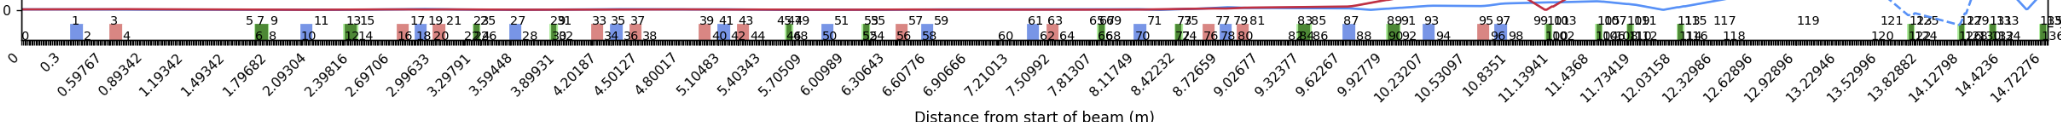

In [1]:
# Import Python modules
%matplotlib ipympl
import sys
import time
from pathlib import Path
import numpy as np
import pandas as pd
import sympy as sp
import sympy.plotting as plot

# Import Beam Dynamics modules
from ebeam import beam
from beamline import lattice, beamline
from schematic import draw_beamline
from excelElements import ExcelElements
from beamOptimizer import beamOptimizer
from AlgebraicOptimization import AlgebraicOpti

In [2]:
# Initial Beam Parameters
Energy = 40  # MeV
f = 2856e6  # Hz
bunch_spread = 2  # ps
energy_std_percent = 0.5
h = 5e9  # 1/s

epsilon_n = 8  # pi.mm.mrad
x_std = 0.8  # mm
y_std = 0.8  # mm
nb_particles = 1000

relat = lattice(1,fringeType=None)
relat.setE(E=Energy)
norm = relat.gamma * relat.beta
epsilon = epsilon_n / norm
x_prime_std = epsilon / x_std
y_prime_std = epsilon / y_std

tof_std = bunch_spread * 1e-9 * f
gen_tof = np.random.normal(0, tof_std, size=(nb_particles, 1))
energy_std = energy_std_percent * 10

ebeam = beam()
beam_dist = ebeam.gen_6d_gaussian(0, [x_std,x_prime_std,y_std,y_prime_std,tof_std,energy_std], nb_particles)
tof_dist = beam_dist[:,4] / f
beam_dist[:,5] += h * tof_dist


In [3]:
# Load Beamline from Excel
path = Path(r"C:\Users\NielsB\cernbox\Hawaii University\Beam dynamics\UH_FELxBeamDyn")
file_path = path / 'Beamline_elements.xlsx'
excel = ExcelElements(file_path)
df = excel.get_dataframe()
beamlineUH = excel.create_beamline()
schem = draw_beamline()
line_UH = relat.changeBeamType("electron", Energy, beamlineUH)

# Optimizer and beamline truncation
print('Number of elements in beamline: ' + str(len(line_UH)))
segments = 138
line = line_UH[:segments]
opti = beamOptimizer(line, beam_dist)

Number of elements in beamline: 138


In [4]:
# Optimization - First Quadrupole Doublet

variables = {
    1: ["I", "current", lambda num:num],
    3: ["I2", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 1},
    "I2": {"bounds": (0, 10), "start": 1},
}

objectives = {8: [{"measure": ["x", "alpha"], "goal": 0, "weight":1}]}            

result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)

# old values
# line[1].current = 0.9989681933
# line[3].current = 1.044851479


x variables:
indice 1 new current value: 0.8317865314376712
indice 3 new current value: 1.116048023472402

y objectives:
indice 8: x alpha value of 3.8370147136955483e-07
Final difference: 1.8691979087402747e-14

Total time: 396.5688834 s
Total iterations: 72



In [5]:
# Optimization - First Chromacity Quad

variables = {10: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {15: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 10 new current value: 4.5780273437500085

y objectives:
indice 15: x disper value of -5.5878629192687665e-08
Final difference: 3.1224212004538863e-15

Total time: 216.7282515 s
Total iterations: 40



In [6]:
# Optimization - Quadrupole Triplet

variables = {
    16: ["I", "current", lambda num:num],
    18: ["I2", "current", lambda num:num],
    20: ["I3", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 5},
    "I3": {"bounds": (0, 10), "start": 3},
}
objectives = {25: [{"measure": ["x", "alpha"], "goal": 0, "weight": 1}]}

result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)

# old values
# line[16].current = 2.4
# line[18].current = 5.108214683
# line[20].current = 3.142089844


x variables:
indice 16 new current value: 2.067010586375832
indice 18 new current value: 4.777362641211564
indice 20 new current value: 3.1551645674317808

y objectives:
indice 25: x alpha value of -0.0006500661893503241
Final difference: 4.225860505364514e-07

Total time: 444.85819459999993 s
Total iterations: 78



In [7]:
# Optimization - Second Chromacity Quad

variables = {27: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {32: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 27 new current value: 4.8316406250000075

y objectives:
indice 32: x disper value of -7.93604511932377e-07
Final difference: 2.0245430561212707e-13

Total time: 233.16404020000004 s
Total iterations: 40



In [8]:
# Optimization - Double Quadrupole Triplet

variables = {
    37: ["I", "current", lambda num:num],
    35: ["I2", "current", lambda num:num],
    33: ["I3", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
    "I3": {"bounds": (0, 10), "start": 2},
}
objectives = {
    37: [
        {"measure": ["x", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["y", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["x", "envelope"], "goal": 2.0, "weight": 1},
        {"measure": ["y", "envelope"], "goal": 2.0, "weight": 1}
    ]
}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)

line[43].current = line[33].current
line[41].current = line[35].current
line[39].current = line[37].current


x variables:
indice 37 new current value: 1.862956432095245
indice 35 new current value: 2.7905330449754073
indice 33 new current value: 0.0

y objectives:
indice 37: x alpha value of -0.008104271412695901
indice 37: y alpha value of -0.011852251762255944
indice 37: x envelope value of 1.058767848440255
indice 37: y envelope value of 1.0329491046200403
Final difference: 0.4553275369489705

Total time: 1505.0020000000002 s
Total iterations: 266



In [9]:
# Optimization - Third Chromacity Quad

variables = {50: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {55: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)



x variables:
indice 50 new current value: 4.694531250000009

y objectives:
indice 55: x disper value of 1.2859670662452823e-06
Final difference: 6.769278719880153e-14

Total time: 155.0926426000001 s
Total iterations: 40



In [10]:
# Optimization - Quadrupole Doublet and Interaction Point (z = 7.11 m, end of element index = 59)

variables = {
    56: ["I", "current", lambda num:num],
    58: ["I2", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
}

objectives = {
    59: [
        {"measure": ["x", "envelope"], "goal": 0.0, "weight": 1},
        {"measure": ["y", "envelope"], "goal": 0.0, "weight": 1}
    ]
}

result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 56 new current value: 2.906246822279445
indice 58 new current value: 3.285335206903019

y objectives:
indice 59: x envelope value of 0.016396371711111288
indice 59: y envelope value of 0.05226736954327404
Final difference: 0.0015003594621310504

Total time: 211.67245570000023 s
Total iterations: 77



In [21]:
# Optimization - Quadrupole Doublet

variables = {
    61: ["I", "current", lambda num:num],
    63: ["I2", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
}

objectives = {
    68: [
        {"measure": ["x", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["y", "alpha"], "goal": 0, "weight": 0},
        {"measure": ["x", "envelope"], "goal": 2.0, "weight": 0},
        {"measure": ["y", "envelope"], "goal": 2.0, "weight": 0}
    ],
    69: [{"measure": ["y", "alpha"], "goal": 0, "weight": 1}]
}

result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)



x variables:
indice 61 new current value: 4.242808268398969
indice 63 new current value: 2.7707612099117487

y objectives:
indice 68: x alpha value of -0.0008288960888703579
indice 68: y alpha value of 0.0105269001469779
indice 68: x envelope value of 1.0116134967639718
indice 68: y envelope value of 1.3714155485591077
indice 69: y alpha value of -0.0009222983168502919
Final difference: 3.075405822818915e-07

Total time: 610.0916123999923 s
Total iterations: 93



In [22]:
# Optimization - Quadrupole Triplet

variables = {
    76: ["I", "current", lambda num:num],
    78: ["I2", "current", lambda num:num],
    80: ["I3", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
    "I3": {"bounds": (0, 10), "start": 2},
}
objectives = {
    86: [
        {"measure": ["y", "envelope"], "goal": 0, "weight": 1},
        {"measure": ["x", "envelope"], "goal": 2, "weight": 1},
        {"measure": ["y", "alpha"], "goal": 0, "weight": 1},
    ]
}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 76 new current value: 3.4585521585027195
indice 78 new current value: 3.819564538293924
indice 80 new current value: 0.8488573916078341

y objectives:
indice 86: y envelope value of 0.019147266637413878
indice 86: x envelope value of 1.9996122365583806
indice 86: y alpha value of -0.0004435196668498873
Final difference: 0.00012228801557302602

Total time: 1858.6365346000093 s
Total iterations: 344



In [23]:
# Optimization - Fifth Chromacity Quad

variables = {87: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {92: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 87 new current value: 5.404980468750008

y objectives:
indice 92: x disper value of -7.840558875572474e-08
Final difference: 6.147436348131829e-15

Total time: 222.11605680000503 s
Total iterations: 42



In [24]:
# Optimization - Quadrupole Triplet and MkIII undulator start (z = 12.389 m , end of element index = 117)

variables = {
    93: ["I", "current", lambda num:num],
    95: ["I2", "current", lambda num:num],
    97: ["I3", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
    "I3": {"bounds": (0, 10), "start": 2},
}
objectives = {
    118: [
        {"measure": ["x", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["y", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["x", "envelope"], "goal": 2.0, "weight": 1},
        {"measure": ["y", "envelope"], "goal": 2.0, "weight": 1}
    ]
}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


#indice 93 new current value: 2.1275944045328767
#indice 95 new current value: 1.543397467601471
#indice 97 new current value: 0.3798657737076452


x variables:
indice 93 new current value: 2.2454704961160266
indice 95 new current value: 2.3734051303112316
indice 97 new current value: 1.4756837795437097

y objectives:
indice 118: x alpha value of 0.003685345765395991
indice 118: y alpha value of 0.0009605693063390486
indice 118: x envelope value of 0.03947031300721425
indice 118: y envelope value of 0.020972858765301992
Final difference: 1.9400598959476036

Total time: 619.4725572999887 s
Total iterations: 122



Simulating Beamline: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:07<00:00]


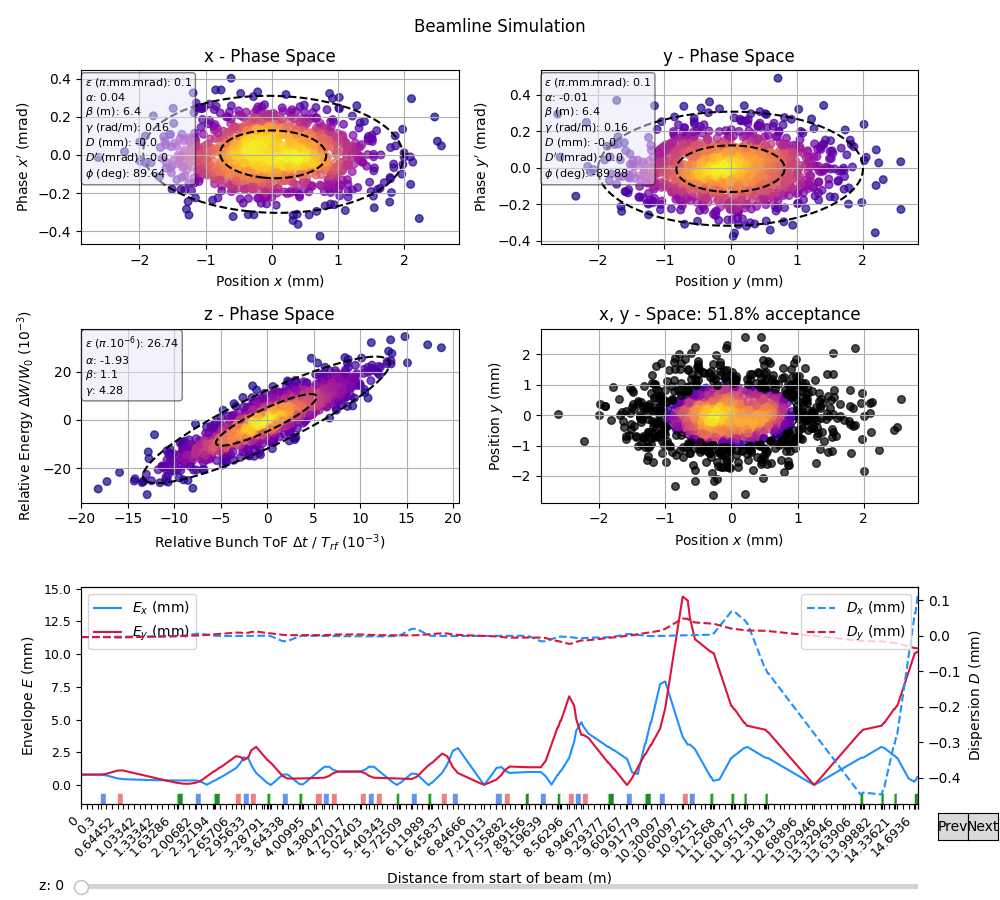

,$\epsilon$ ($\pi$.mm.mrad),$\alpha$,$\beta$ (m),$\gamma$ (rad/m),$D$ (mm),$D^{\prime}$ (mrad),$\phi$ (deg)
x,"[0.10026255616859181, 0.10026255616859182, 0.1...","[0.039725448582964264, 0.02408488539738579, 0....","[6.4037215244821395, 6.397340491084105, 6.3940...","[0.1564056318557847, 0.15640563185578468, 0.15...","[-0.003286036107456179, -0.0033000961028780843...","[-0.00014059995421906147, -0.00014059995421906...","[89.6356870880495, 89.77888971563134, 89.92243..."
y,"[0.10455516174587023, 0.10455516174587025, 0.1...","[-0.012905438730725582, -0.028537868729381584,...","[6.398023534631668, 6.40216786537768, 6.409438...","[0.1563242999865601, 0.15632429998656008, 0.15...","[-0.003237040328101279, -0.0032200208598780716...","[0.00017019468223204397, 0.0001701946822320439...","[-89.88153499079178, -89.73821727909397, -89.5..."
z,"[26.743214999970174, 26.743214999970174, 26.74...","[-1.9255029841232685, -1.9248621044950602, -1....","[1.0996180696167233, 1.0990416692866518, 1.098...","[4.281088017686407, 4.281088017686407, 4.28108...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-25.219263367572697, -25.212032068077676, -25..."


In [25]:
# Display Optimized Beamline

%matplotlib ipympl
acceptance = {"shape":'circle', "radius":1, "origin":[0,0]}
schem.plotBeamPositionTransform(beam_dist, line, 0.1, plot=True, showIndice=False, 
                                defineLim=False, matchScaling=False, shape=acceptance)

